<a href="https://colab.research.google.com/github/pjwu1997/FinancialEngineering/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Calculate Yield Curve From Bond Price 

import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import sympy

def calculate_ytm(price,par_value,coupon_rate,period,terms):
    x = Symbol('x')
    eq_str = str(price)+'*x**'+str(terms)+'-('
    C = par_value * coupon_rate * period 
    for i in range(terms):
        if i != terms-1:
            tmp = str(C) + '*' + 'x' + '**' + str(i) + '+'
        else:
            tmp = str(C) + '*' + 'x' + '**' + str(i) + ')-'
        eq_str += tmp
    eq_str += str(par_value)
    #print(eq_str)
    #print(solve(eq_str))
    solution = solve(eq_str)
    #print(type(solution[0]))
    solution = [i for i in solution if isinstance(i,sympy.numbers.Float)]
    solution = [i for i in solution if i > 0]
    #print(solution)
    ytm = (solution[0] - 1)/period
    return ytm

def calculate_spot(bond_array,period):
    spot_array = [bond_array[0].ytm] #initialization
    for i in range(1,len(bond_array)):
        price = bond_array[i].price
        coupon_rate = bond_array[i].coupon_rate
        par_value = bond_array[i].par_value
        #print('par='+str(par_value))
        C = par_value * coupon_rate * period
        LHS = price
        RHS = 0
        for j in range(0,len(spot_array)):
            RHS += C * ((1+spot_array[j]*period)**(-(j+1)))
        #print('LHS='+str(LHS))
        #print('RHS='+str(RHS))
        #print(1.002**-1)
        #print((par_value+C) / (LHS-RHS))
        spot_array.append(((((par_value+C) / (LHS-RHS)) ** (1/(i+1)))-1) / period)
    return spot_array

def calculate_forward(spot_array):
    forward_matrix = np.zeros((len(spot_array),len(spot_array)))
    for i in range(len(spot_array)):
        for j in range(i,len(spot_array)):
            if i == j : continue
            forward_matrix[i][j] = (((1 + spot_array[j] * period) ** j / (1 + spot_array[i] * period) ** i) ** (1/(j-i))-1)/period 
    return forward_matrix

class bond():
    def __init__(self,price,par_value,coupon_rate,y_to_maturity,period):
        self.price = price
        self.par_value = par_value
        self.coupon_rate = coupon_rate
        self.y_to_maturity = y_to_maturity
        self.terms = int(y_to_maturity / period)
        self.period = period
        self.ytm = calculate_ytm(self.price,self.par_value,self.coupon_rate,self.period,self.terms)


period = float(input('請輸入債券多久計息一次（年）ex:半年計息一次，輸入0.5:'))
n_terms = int(input('請輸入總共有幾期債券(>3):'))
bond_array = []
for i in range(1,n_terms+1):
    price = float(input('請輸入'+str(i*period)+'年後到期債券之價格:'))
    par_value = float(input('請輸入第'+str(i*period)+'年後到期債券之面額:'))
    coupon_rate = float(input('請輸入第'+str(i*period)+'年後到期債券之年利率(%):'))/100
    y_to_maturity = i*period
    bond_array.append(bond(price,par_value,coupon_rate,y_to_maturity,period))

yield_array = [i.ytm for i in bond_array]
spot_array = calculate_spot(bond_array,period)
forward_matrix = calculate_forward(spot_array)

請輸入債券多久計息一次（年）ex:半年計息一次，輸入0.5:1
請輸入總共有幾期債券(>3):5
請輸入1.0年後到期債券之價格:100
請輸入第1.0年後到期債券之面額:100
請輸入第1.0年後到期債券之年利率(%):2
請輸入2.0年後到期債券之價格:100
請輸入第2.0年後到期債券之面額:103
請輸入第2.0年後到期債券之年利率(%):2
請輸入3.0年後到期債券之價格:100
請輸入第3.0年後到期債券之面額:107
請輸入第3.0年後到期債券之年利率(%):2
請輸入4.0年後到期債券之價格:100
請輸入第4.0年後到期債券之面額:112
請輸入第4.0年後到期債券之年利率(%):2
請輸入5.0年後到期債券之價格:100
請輸入第5.0年後到期債券之面額:119
請輸入第5.0年後到期債券之年利率(%):2


首先，使用class bond()來儲存輸入的債券資料，並透過calculate_ytm來計算其殖利率。
使用到的公式為：
![](https://latex.codecogs.com/gif.latex?PV&space;=\sum_{i=1}^{n}\frac{C}{(1&plus;r_i)^n}&plus;\frac{F}{(1&plus;r_n)^n})

移項後為一n次多項式，使用Sympy求解，過濾掉複數解與負解後求得ytm.
![alt text](https://)
而後透過calculate_spot函數計算spot rate,使用到的公式為：
![](https://latex.codecogs.com/gif.latex?PV&space;=\sum_{i=1}^{n}\frac{C}{(1&plus;r_i)^n}&plus;\frac{F}{(1&plus;r_n)^n})

使用拔靴法計算之。

最後使用Spot rate反推Forward Rate,儲存forward_matrix中。


In [0]:
yield_array #Yield Curve

[0.0200000000000000,
 0.0353395553343296,
 0.0437418127370219,
 0.0502318265926867,
 0.0576629647740685]

In [0]:
spot_array #Spot Curve

[0.0200000000000000,
 0.0354976355414469,
 0.0440287805017014,
 0.0506687296614086,
 0.0583705167460529]

In [0]:
forward_matrix #Forward Rate Matrix

array([[0.        , 0.03549764, 0.04402878, 0.05066873, 0.05837052],
       [0.        , 0.        , 0.05263021, 0.05833743, 0.06610654],
       [0.        , 0.        , 0.        , 0.06407559, 0.07290926],
       [0.        , 0.        , 0.        , 0.        , 0.08181628],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

ERROR! Session/line number was not unique in database. History logging moved to new session 59


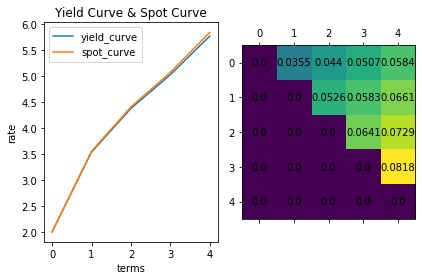

In [0]:
import matplotlib.pyplot as plt
plt.figure(1)
ax1 = plt.subplot(1,2,1)
ax1.plot(100*np.array(yield_array),label = 'yield_curve')
ax1.plot(100*np.array(spot_array),label = 'spot_curve')
ax1.legend()
ax1.set_title('Yield Curve & Spot Curve')
ax1.set_xlabel('terms')
ax1.set_ylabel('rate')
ax2 = plt.subplot(1,2,2)
ax2.matshow(forward_matrix)
for i in range(len(forward_matrix)):
    for j in range(len(forward_matrix)):
        text = ax2.text(j,i,round(forward_matrix[i,j],4),ha='center',va='center')
plt.tight_layout()

使用Matplotlib繪圖。